# Lecture Week 4-1


## I. Probability and $\chi^2$

### &nbsp; &nbsp; &nbsp; &nbsp;  B) Confidence Levels


## II. The curve_fit function and Covariance 

## III. Other user functions (e.g. Gaussian function)

## Lab: Application of curve_fit




In [110]:
'''
Three more numpy array methods and an attribute:

.flatten (or .ravel) 

and 

.reshape

and

.transpose (or .T; my guess: @property)


'''

shape = (5, 2)
a = np.ones(shape)
print('a:', a)

a_flat = a.flatten()
a_flatt = a.ravel()

print('a_flat:', a_flat)
print('a_flatt:', a_flatt)

a_reshaped = a_flat.reshape(shape)
print('a_reshaped:', a_reshaped)

print('a transposed:', a.T)
print('a transposed:', a.transpose())

a: [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
a_flat: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
a_flatt: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
a_reshaped: [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
a transposed: [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
a transposed: [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


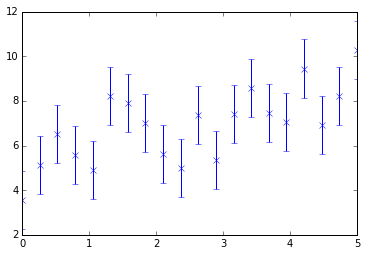

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gen_lin_data(m_true, b_true, x_min, x_max, sig, N = 20):

    x = np.linspace(x_min, x_max, N) 
    return x, m_true * x + b_true + np.random.randn(x.shape[0]) * sig

m_true, b_true = 0.7, 5.
sig = 1.3
x, y = gen_lin_data(m_true, b_true, 0., 5., sig)
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.show()


3.64747204247 15.9215575828
9.93


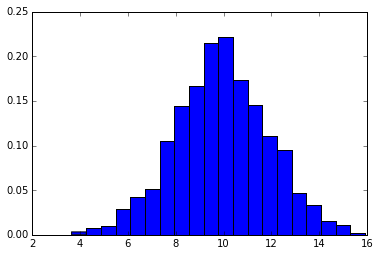

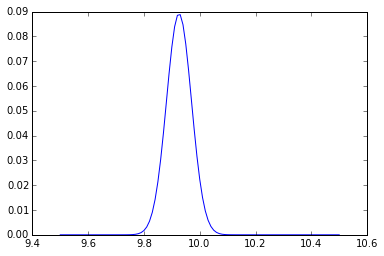

In [113]:
%matplotlib inline
'''
This is the Lab Breakout 1 Solution from Week3-2: Just to get the probability
'''

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
mu = 10.
sigma = 2.

N = 2000
yd = np.random.randn(N)*sigma + mu

nbins = 20
plt.hist(yd, bins = nbins, normed = 1)
chi2 = []

ylo, yhi = yd.min(), yd.max()
print(ylo, yhi)
ys = np.linspace(9.5, 10.5, 101)
chi2_min = 1e6

for y_guess in ys:
    chi2_single = ((yd - y_guess)**2/sigma**2).sum()
    if chi2_single < chi2_min:
        chi2_min = chi2_single
        y_best = y_guess
    chi2.append(chi2_single)

#y_best should agree with ydmean.
#ydmean = yd.mean()
print(y_best)
    
chi2 = np.array(chi2)
del_chi2 = chi2 - chi2.min()
P = np.exp(-del_chi2/2)
P /= P.sum()
plt.figure()
plt.plot(ys, P)
plt.show()

# Watch how the width of P changes with N, say N = 500, 2000, 10000

1.0
0.04 0.04472135955
0.09 0.0894427191
0.13 0.13416407865


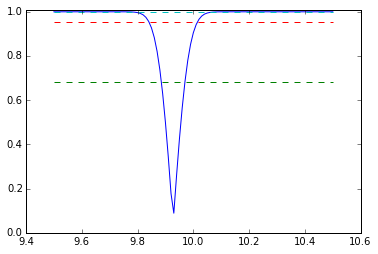

In [114]:
def compute_sigma_level(P):
    """
        Input: probability 
        Returns: CDF
        
        Adopted from: 
        
        https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
    """
    
    # save the original shape
    shape_orig = P.shape
    # this flattens the array.
    P = P.ravel()   
    
    # obtain the indices to sort and unsort the flattened array
    # i_sort will sort L in descending order
    i_sort = np.argsort(P)[::-1]
    i_unsort = np.argsort(i_sort)
    
    P_cumsum = P[i_sort].cumsum()
    # normalization
    P_cumsum /= P_cumsum[-1]
    
    return P_cumsum[i_unsort].reshape(shape_orig)


CDF = compute_sigma_level(P)
print(CDF[-1])
sig1idx = np.argmin(np.abs(CDF - 0.683))
print(np.abs(ys[sig1idx] - y_best), sigma/np.sqrt(N))
sig2idx = np.argmin(np.abs(CDF - 0.954))
print(np.abs(ys[sig2idx] - y_best), 2*sigma/np.sqrt(N))
sig3idx = np.argmin(np.abs(CDF - 0.997))
print(np.abs(ys[sig3idx] - y_best), 3*sigma/np.sqrt(N))

plt.figure()
plt.plot(ys, CDF)
plt.plot([ys.min(), ys.max()], [0.683, 0.683], '--')
plt.plot([ys.min(), ys.max()], [0.954, 0.954], '--')
plt.plot([ys.min(), ys.max()], [0.997, 0.997], '--')
plt.ylim(0, 1.01)

plt.show()

## Breakout Exercise:

-  ## Use grid search method do find the best-fit m and b.
-  ## Find P based on chi^2, and then CDF
-  ## Draw 68%, 95% contours for CDF

## Students who have taken CP-I should code

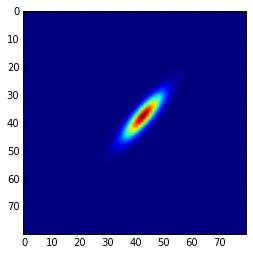

In [40]:
# pyplot.imshow and 3D plot
plt.imshow(P)
plt.show()

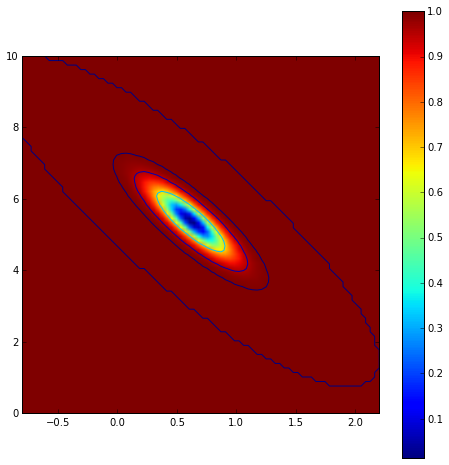

In [59]:
# pyplot.imshow and 3D plot

fig, ax = plt.subplots(figsize = (8, 8))
# another way of doing imshow -- note the [::-1] 
im_ax = ax.imshow(CDF.T[::-1, :], extent = [m_start, m_end, b_start, b_end])

#change aspect ratio
#ax.set_aspect(0.3) # you may also use am.imshow(..., aspect="auto") to restore the aspect ratio
# add a colorbar
#fig.colorbar(im_ax)
# Check the color map
#CS = plt.contour(mv, bv, 1 - CDF.T, levels=[1.-level for level in contour_levels])

plt.show()

[ 5.51844378  0.63052598]
[[ 0.18927593 -0.05532681]
 [-0.05532681  0.02213072]]


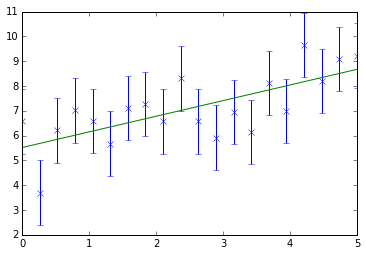

In [98]:
# scipy.optimize.curve_fit

from scipy.optimize import curve_fit


#coeffs, cov = curve_fit(f, x, y)
# give it a little help:
coeffs, cov = curve_fit(f, x, y, p0 = [0.7, 5.])
m_best = coeffs[0]
b_best = coeffs[1]
print(coeffs)
print(cov)
plt.errorbar(x, y, yerr = sig, fmt = 'x')
plt.plot(x, f(x, m_best, b_best ))
plt.show()

## Lab Breakout Exercise

## simulate sine wave data with non-uniform variance (assume variance increases slightly with the ind variable x); then fit period and phase of sine function to data, find covariance, plot confidence contours, use grid search.  Maybe David Hogg's article has good examples (exponential curve? Lorentzian?  Planck Black Body curve?)?



## Lab: CDF and confidence levels for non-uniform variance.


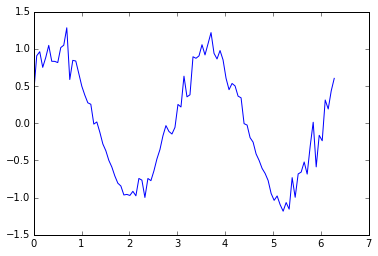

In [107]:
from scipy.constants import pi
x = np.linspace(0, 2*pi, 101)
k = 2.
phi = pi/6.
err = np.cos(x)*0.2
y = np.sin(k*x + phi) + np.random.randn(x.shape[0])*err
plt.plot(x, y)
plt.show()

# End of Week4-1